In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm_notebook


In [41]:
def new_alpha(last_A, mu, L):
    x = (1 + mu * last_A) / 2 / L
    y = (1 + mu * last_A) / 2 / L
    z = last_A * (1 + mu * last_A) / L
    return x + np.sqrt(y ** 2 + z)


def generate_seq(delta_0, mu, L, alpha, R, iters = 100):
    coef = alpha * R * np.sqrt(2 * L)
    print(coef)
    a0 = 1 / L
    A0 = 1 / L
    sseq = [coef * delta_0 * a0]
    deltaseq = [delta_0]
    aseq = [a0]
    Aseq = [A0]
    for j in tqdm_notebook(range(iters)):
        new_a = new_alpha(Aseq[-1], mu, L)
        add = coef * aseq[-1] * deltaseq[-1]
        # add = 0
        newA = Aseq[-1] + new_a
        # add += 0.1 * Aseq[-1] * deltaseq[-1] ** 2
        sseq.append(sseq[-1] + add)
        newA = Aseq[-1] + new_a
        val = 2 * R ** 2 + sseq[-1]
        new_delta = np.sqrt(val / newA)
        deltaseq.append(new_delta)
        aseq.append(new_a)
        Aseq.append(newA)
    return deltaseq


0.2


/tmp/ipykernel_1699636/2857212885.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm_notebook(range(iters)):


  0%|          | 0/100 [00:00<?, ?it/s]

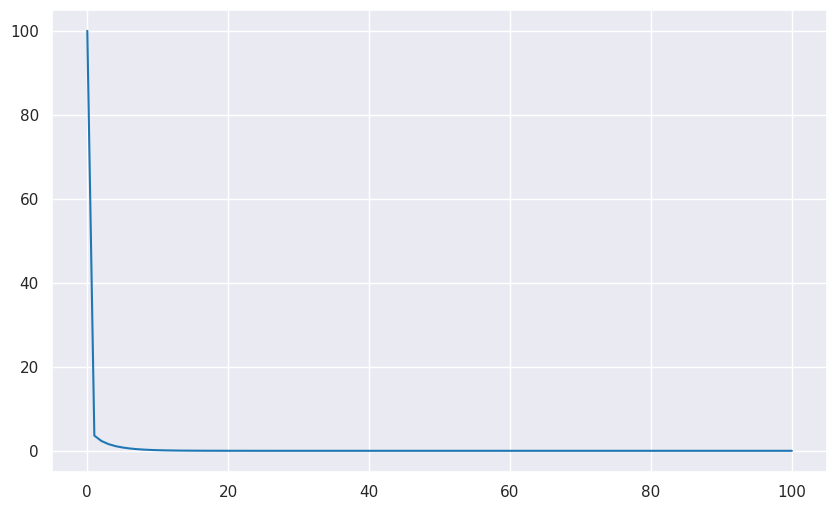

In [46]:
delta_0 = 100
mu = 1
L = 2
alpha = 0.1
R = 1
iters = 100

seq = generate_seq(delta_0, mu, L, alpha, R, iters)


with sns.plotting_context('notebook'), sns.axes_style('darkgrid'):
    plt.figure(figsize=(10, 6))
    plt.plot(range(iters + 1), seq)
    plt.show()


In [45]:
seq

[100,
 8.001706382176275,
 5.385790307896111,
 3.8486821812211147,
 2.849768894113943,
 2.170185671995497,
 1.697168605924856,
 1.3637193993245589,
 1.1266855722478217,
 0.9570631970866327,
 0.834939129177939,
 0.7464956376533921,
 0.682083854020114,
 0.6349296305987799,
 0.6002488374265732,
 0.5746398832138571,
 0.555666512769175,
 0.541571042944759,
 0.5310765786733648,
 0.5232497505907093,
 0.5174046626540927,
 0.5130350444674551,
 0.5097658669109684,
 0.5073185252724359,
 0.5054855826771392,
 0.5041123216029111,
 0.5030831907224278,
 0.5023118016440502,
 0.501733518359267,
 0.5012999514381768,
 0.500974858166877,
 0.500731084315037,
 0.500548279867577,
 0.5004111911279361,
 0.5003083827850782,
 0.5002312811478089,
 0.50017345751883,
 0.5001300912591421,
 0.5000975673868294,
 0.500073174945247,
 0.5000548808743112,
 0.5000411604675045,
 0.5000308702447483,
 0.5000231526240033,
 0.500017364434501,
 0.500013023307031,
 0.500009767469673,
 0.5000073255962921,
 0.5000054941938651,
 0.50